In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_img0.jpg to test_img0.jpg
Saving test_img9.jpg to test_img9.jpg
Saving test_img11.jpg to test_img11.jpg


In [ ]:
!ls

gdrive	sample_data  test_img0.jpg  test_img11.jpg  test_img9.jpg


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
bgr_img = cv2.imread('/content/test_img0.jpg')

In [ ]:
print(bgr_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


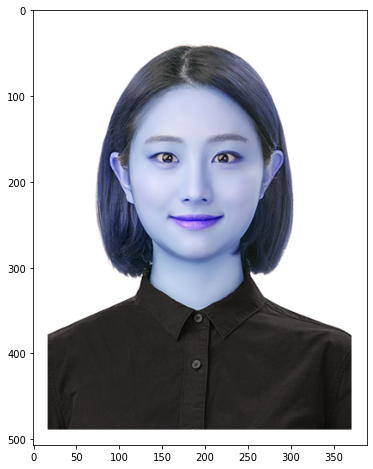

In [ ]:
plt.imshow(bgr_img)

In [ ]:
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

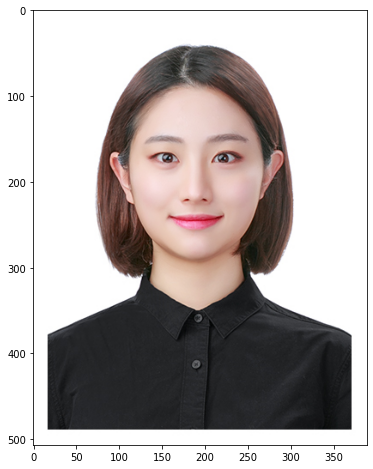

In [ ]:
plt.imshow(rgb_img)

In [ ]:
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV) 

In [ ]:
hsv_img= cv2.fastNlMeansDenoisingColored(hsv_img,None,10,10,7,21)

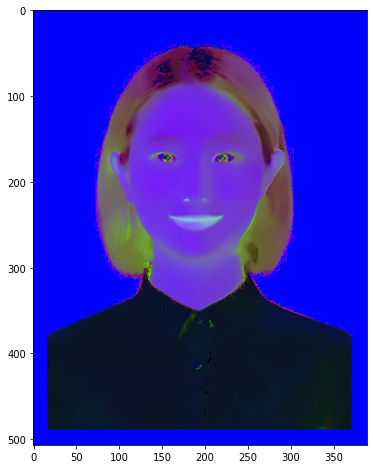

In [ ]:
plt.imshow(hsv_img)

In [ ]:
lower = np.array([112, 10, 175], dtype="uint8")
upper = np.array([150, 50, 250], dtype="uint8")

face_mask = cv2.inRange(hsv_img, lower, upper)

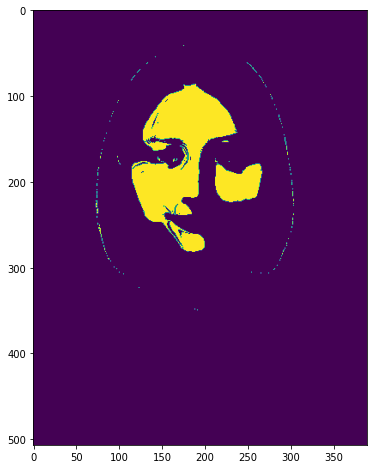

In [ ]:
plt.imshow(face_mask)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)) 
face_mask = cv2.erode(face_mask, kernel, iterations = 2)
face_mask = cv2.dilate(face_mask, kernel, iterations = 8)

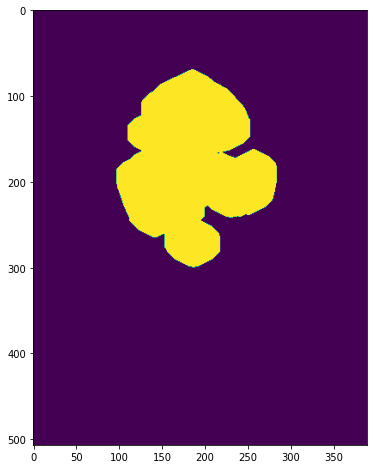

In [ ]:

plt.imshow(face_mask)

In [ ]:
skinMask = cv2.GaussianBlur(face_mask, (3, 3), 0)

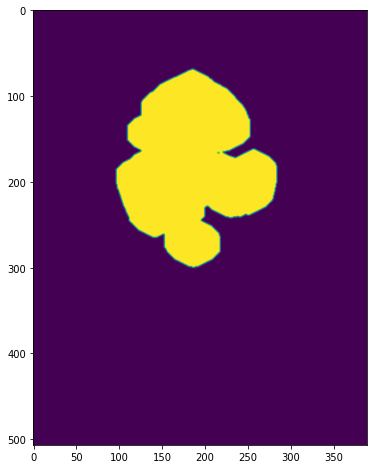

In [ ]:
plt.imshow(skinMask)

In [ ]:
contours, hierarchy = cv2.findContours(skinMask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    rect = cv2.boundingRect(contour)
    xmin, ymin, width, height = rect

    

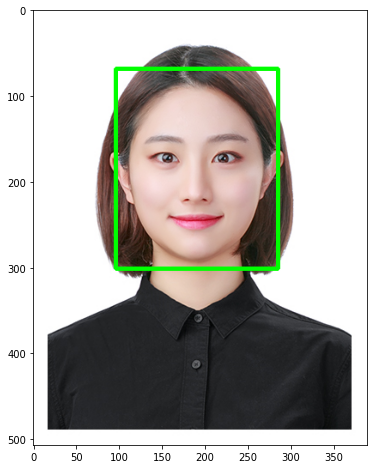

In [ ]:
cv2.rectangle(rgb_img, (xmin, ymin), (xmin + width, ymin + height), (0, 255, 0), 3)
plt.imshow(rgb_img)